Initial Setup

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('airline-passenger-traffic.csv', header=None)
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'], format="%Y-%m")
data = data.set_index('Month')

In [3]:
data.head(10)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


**Time series analysis**

Text(0.5, 1.0, 'Air passenger traffic plot')

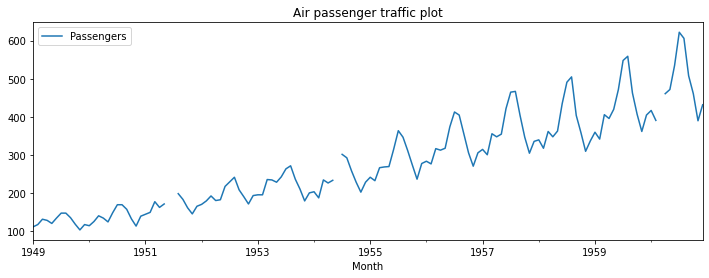

In [4]:
data.plot(figsize=(12,4))
plt.title('Air passenger traffic plot')

We see there is a missing data in the given time series. 
We can observe also seasonality in the given data.
Lets fill the missing value with some estimates
Data missing will occur due to 2 main reasons
1. System reason: In this case due to some system issue because of which data could not found in those time. Ex: Store was closed during a period of day and hence data was not generated for that time.
2. System/Human error: In this case we miss to record the data.

1. Mean Imputation: Imputing the missing values with the overall mean of the data
2. Last observation carried forward: We impute the missing values with its previous value in the data.
3. Linear interpolation: You draw a straight line joining the next and previous points of the missing values in the data.
4. Seasonal + Linear interpolation: This method is best applicable for the data with trend and seasonality. Here, the missing value is imputed with the average of the corresponding data point in the previous seasonal period and the next seasonal period of the missing value.

Text(0.5, 1.0, 'Air passenger traffic plot with mean inputation')

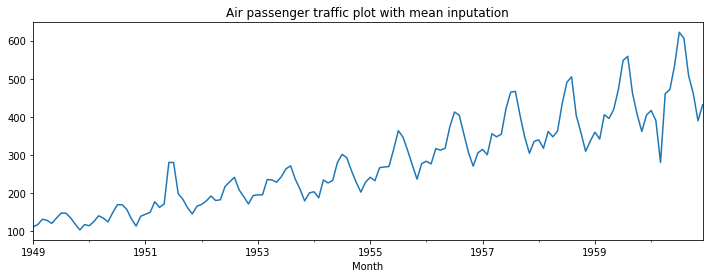

In [5]:
#Mean imputation
data = data.assign(Passenger_mean_imputation = data.Passengers.fillna(data.Passengers.mean()))
data['Passenger_mean_imputation'].plot(figsize=(12,4))
plt.title('Air passenger traffic plot with mean inputation')

Text(0.5, 1.0, 'Air passenger traffic plot with linear inputation')

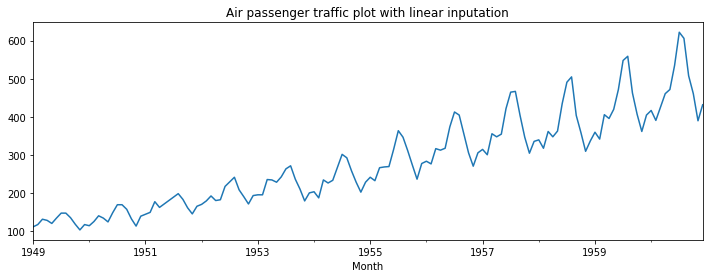

In [6]:
##Linear interpolation
data = data.assign(Passenger_linear_imputation = data.Passengers.interpolate(method='linear'))
data['Passenger_linear_imputation'].plot(figsize=(12,4))
plt.title('Air passenger traffic plot with linear inputation')

In [7]:
data.Passengers = data['Passenger_linear_imputation']

**Handling Outliers**

Method of detecting outliers:
1. Extreme value analysis: Remove the smallest and largest values in the dataset.
2. Box Plot: The points lying on either side of the whiskers are considered to be outliers. The length of these whiskers is subjective and can be defined by you according to the problem.
3. Histogram: Simply plotting a histogram can also reveal the outliers - basically the extreme values with low frequencies visible in the plot.

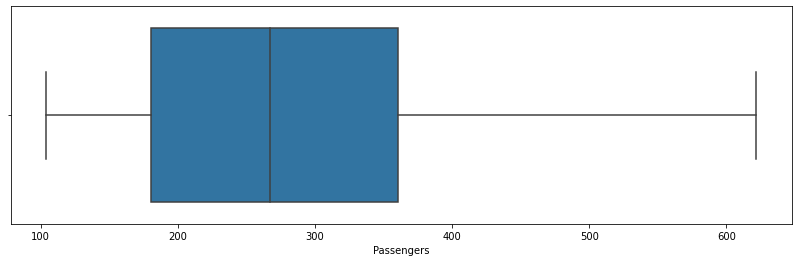

In [8]:
import seaborn as sns;
fig = plt.subplots(figsize=(14,4))
sns.boxplot(x=data.Passengers, whis=1.5)

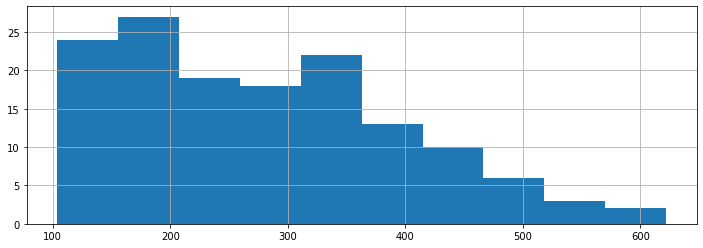

In [9]:
data.Passengers.hist(figsize=(12,4))

From above two plots it is evident that no outliers are present in the given data.

**There are two ways in which the time series data can be decomposed**:
 
1. Additive Seasonal Decomposition - the individual components can be added to get the time-series data
2. Multiplicative Seasonal Decomposition - the individual components can be multiplied to get the time-series data

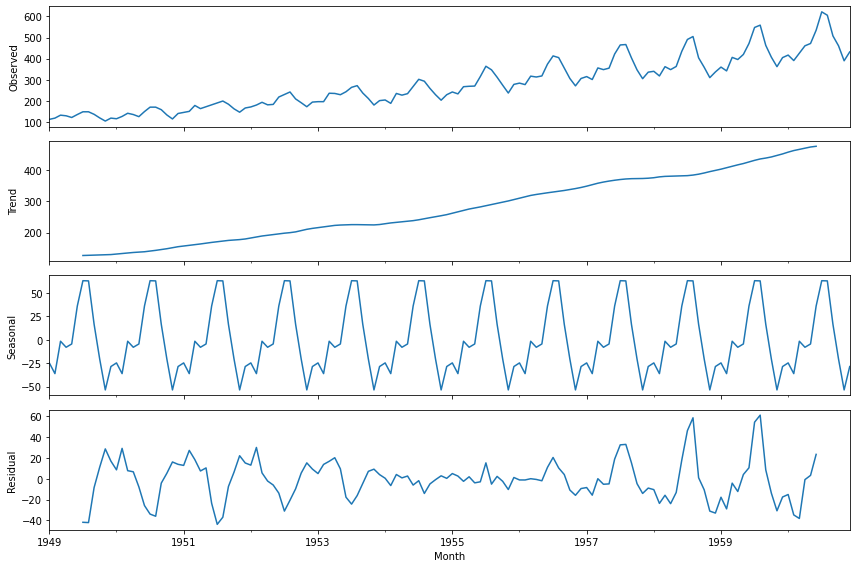

In [10]:
##Additive Seasonal Decomposition 
from pylab import rcParams;
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()

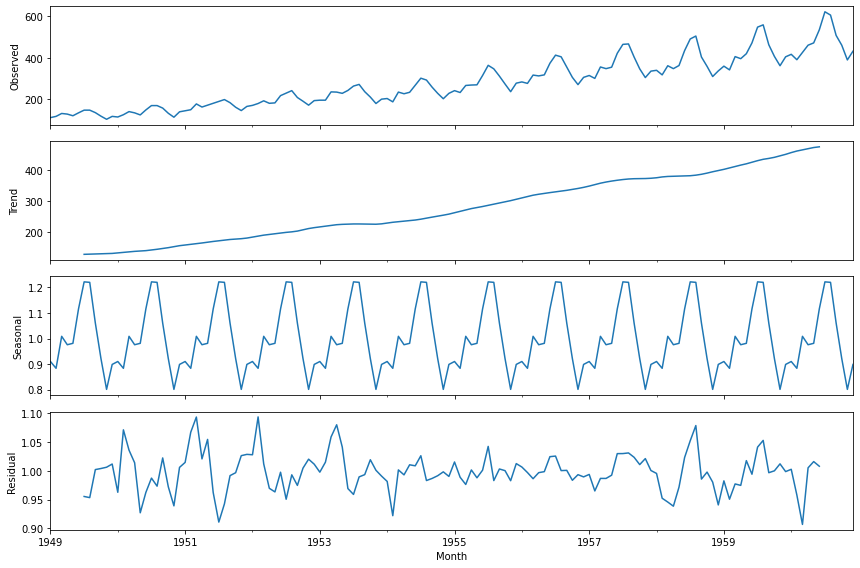

In [11]:
##Multiplicative Seasonal Decomposition
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig = decomposition.plot()

**Forecast Models**

In [12]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

In [13]:
## Naive method : Forecast = Last month’s sales
y_hat_naive = test.copy()
y_hat_naive['naive_forcast'] = train['Passengers'][train_len-1]

Text(0.5, 1.0, 'Naive Method')

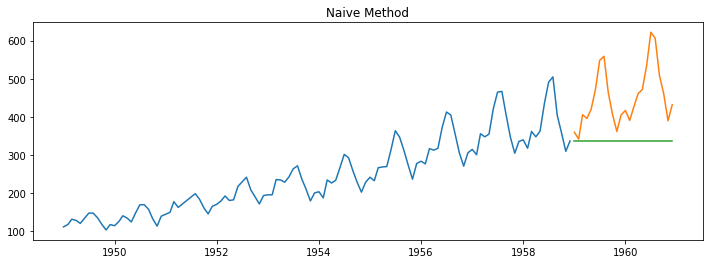

In [14]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forcast'], label='naive_forcast')
plt.title('Naive Method')

**Error Measures**
 
**Mean Forecast Error (MFE)**: In this naive method, you simply subtract the actual values of the dependent variable, i.e., 'y' with the forecasted values of 'y'. This can be represented using the equation below.

**Mean Absolute Error (MAE)**: Since MFE might cancel out a lot of overestimated and underestimated forecasts, hence measuring the mean absolute error or MAE makes more sense as in this method, you take the absolute values of the difference between the actual and forecasted values.
 

**Mean Absolute Percentage Error (MAPE)**: The problem with MAE is that even if you get an error value, you have nothing to compare it against. For example, if the MAE that you get is 1.5, you cannot tell just on the basis of this number whether you have made a good forecast or not. If the actual values are in single digits, this error of 1.5 is obviously high but if the actual values are, say in the order of thousands, an error of 1.5 indicates a good forecast. So in order to capture how the forecast is doing based upon the actual values, you evaluate mean absolute error where you take the mean absolute error (MAE) as the percentage of the actual values of 'y'.
 
**Mean Squared Error (MSE)**: The idea behind mean squared error is the same as mean absolute error, i.e., you want to capture the absolute deviations so that the negative and positive deviations do not cancel each other out. In order to achieve this, you simply square the error values, sum them up and take their average. This is known as mean squared error or MSE which can be represented using the equation below.
 
**Root Mean Squared Error (RMSE)**: Since the error term you get from MSE is not in the same dimension as the target variable 'y' (it is squared), you deploy a metric known as RMSE wherein you take the square root of the MSE value obtained.


In [15]:
rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat_naive.naive_forcast)).round(2)
mape = np.round(np.mean(np.abs(test.Passengers - y_hat_naive.naive_forcast)/test.Passengers)*100,2)

In [16]:
results = pd.DataFrame({'Method':['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method','RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Method,137.51,23.63


**Simple Moving Average Method**

In [17]:
y_hat_sma = data.copy()
ma_window = 12;
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()


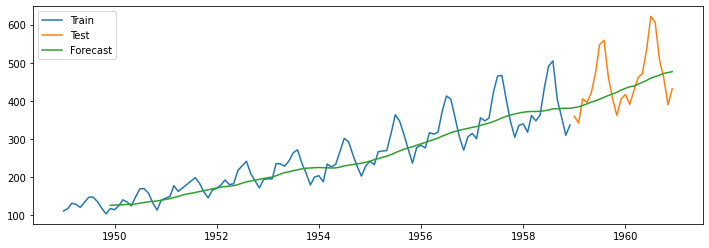

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Forecast')
plt.legend()

In [19]:
rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat_sma.sma_forecast[train_len:])).round(2)
mape = np.round(np.mean(np.abs(test.Passengers -  y_hat_sma.sma_forecast[train_len:])/test.Passengers)*100,2)
results = pd.DataFrame({'Method':['SMA Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method','RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,SMA Method,72.23,11.16


Now, that you have learnt to forecast the future using the simple moving average technique, let's understand what happens to the forecast if we change the moving average window for the air passenger traffic data.

,Method,RMSE,MAPE
0,SMA Method,43.33,7.96


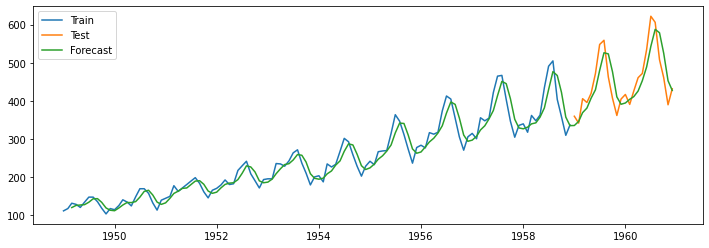

In [20]:
y_hat_sma = data.copy()
ma_window = 3;
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Forecast')
plt.legend()
rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat_sma.sma_forecast[train_len:])).round(2)
mape = np.round(np.mean(np.abs(test.Passengers -  y_hat_sma.sma_forecast[train_len:])/test.Passengers)*100,2)
results = pd.DataFrame({'Method':['SMA Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method','RMSE', 'MAPE']]
results

**Simple Exponential Smoothing**
 
In the simple moving average technique, we consider each observation in that window to equally influence the next value in the forecast. But intuitively, shouldn’t the most recent observations influence the next value more than past observations? 

In this technique more recent observations get more weight, whereas the previous observations get less weight. 

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train.Passengers);
model_fit = model.fit(smoothing_level=0.3, optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

,Method,RMSE,MAPE
0,SMA Method,114.19,17.87


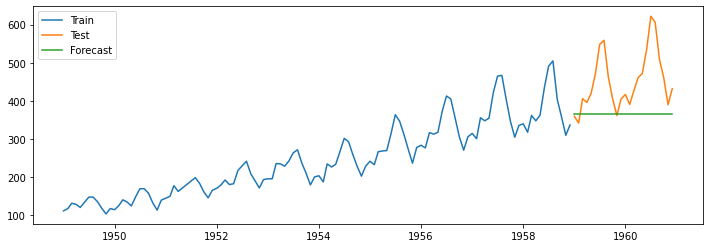

In [34]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Forecast')
plt.legend()
rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat_ses.ses_forecast)).round(2)
mape = np.round(np.mean(np.abs(test.Passengers -  y_hat_ses.ses_forecast)/test.Passengers)*100,2)
results = pd.DataFrame({'Method':['SMA Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method','RMSE', 'MAPE']]
results

If we assign *smoothing_level* to 1 this will become equivalent to Naive method.

### **Holt's Exponential Smoothing**
 
Simple exponential smoothing technique captures level of a time series. Holt's exponential smoothing technique captures both level and trend of a time series in the forecast.


In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing;
model = ExponentialSmoothing(np.array(train.Passengers), seasonal_periods=12, trend='additive', seasonal=None);
model_fit = model.fit(smoothing_level=0.3, smoothing_slope=0.02, optimized=False)
print(model_fit.params)
y_hat_hes = test.copy()
y_hat_hes['hes_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3, 'smoothing_slope': 0.02, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,RMSE,MAPE
0,SMA Method,86.62,12.35


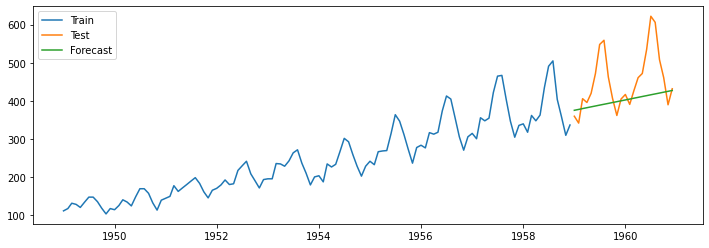

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hes['hes_forecast'], label='Forecast')
plt.legend()
rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat_hes['hes_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test.Passengers -  y_hat_hes['hes_forecast'])/test.Passengers)*100,2)
results = pd.DataFrame({'Method':['SMA Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method','RMSE', 'MAPE']]
results

### **Holt-Winters's Exponential Smoothing**
 
Holt-Winters' Exponential Smoothing technique which forecasts based on level, trend and seasonality of a time series.

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing;
model = ExponentialSmoothing(np.array(train.Passengers), seasonal_periods=12, trend='add', seasonal='multiplicative');
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm = test.copy()
y_hat_hwm['hwm_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.38484064840698556, 'smoothing_slope': 0.035386453247783, 'smoothing_seasonal': 0.6151593186319729, 'damping_slope': nan, 'initial_level': 212.39830870038878, 'initial_slope': 1.1057967107993691, 'initial_seasons': array([0.51755725, 0.54595018, 0.60261532, 0.56966257, 0.52017629,
       0.5722879 , 0.62749981, 0.62520353, 0.56963344, 0.49468435,
       0.43937027, 0.51362925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,RMSE,MAPE
0,SMA Method,34.83,6.91


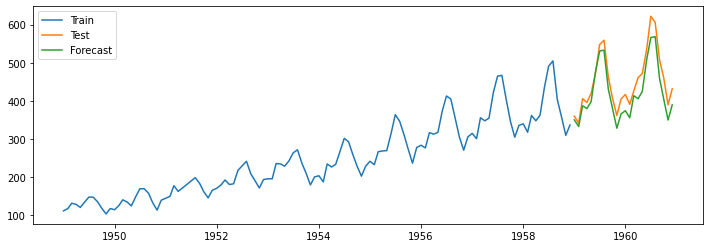

In [58]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hwm_forecast'], label='Forecast')
plt.legend()
rmse = np.sqrt(mean_squared_error(test.Passengers, y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test.Passengers -  y_hat_hwm['hwm_forecast'])/test.Passengers)*100,2)
results = pd.DataFrame({'Method':['SMA Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method','RMSE', 'MAPE']]
results